<a href="https://www.kaggle.com/code/philoatef/efficient-net-brain-tumor?scriptVersionId=97943129" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
!pip install imutils

import imutils
import tensorflow as tf
import pandas as pd
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models
from keras.models import load_model
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D,MaxPool2D,GlobalAveragePooling2D,Dropout
import matplotlib.pyplot as plt
import numpy as np
import cv2 
import os
from tensorflow.keras.applications import EfficientNetB0
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import image
from sklearn.model_selection import train_test_split
from keras.applications.xception import Xception
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

  Preparing metadata (setup.py) ... - done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25858 sha256=102b4f2ac821b5de13bdb960abff32bbb90d4c1b622bde5af4fdca06e69b2f57
  Stored in directory: /root/.cache/pip/wheels/86/d7/0a/4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built imutils


> finished importing all the important imports and then i'll move onto loading the EfficientNetB0 pretrained model and loading imagenet weights that is trained on 1000 classes where i'll then later add more layers and squish it down into 3 classes.

# INVERNOE CODE

In [2]:
def translate(predict,class_names):
    index = np.argmax(predict)
    return class_names[index]

In [3]:
class_names= ['glioma','meningioma','ptitutary']

training_dataset = tf.keras.utils.image_dataset_from_directory(
    '../input/braintumor3/braintumor3',
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=69,
    validation_split=0.15,
    subset='training',
    class_names= class_names
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    '../input/braintumor3/braintumor3',
    labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=69,
    validation_split=0.15,
    subset='validation',
    class_names=class_names
)

def normalize_image(image, label):
  return tf.cast(image, tf.float32) / 255., label

#training_dataset = training_dataset.map(normalize_image)

#training_dataset = training_dataset.mapOneComponent(0, tf.math.divide(features,tf.constant(255.0)))
#validation_dataset = validation_dataset.mapOneComponent(0,tf.math.divide(features,tf.constant(255.0)))

#print(list(training_dataset.as_numpy_iterator()))

Found 7787 files belonging to 3 classes.
Using 6619 files for training.


2022-06-09 21:56:51.044038: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-09 21:56:51.218929: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-09 21:56:51.220123: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-09 21:56:51.226046: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Found 7787 files belonging to 3 classes.
Using 1168 files for validation.


Data Augmentation

In [4]:
dataset_path = os.listdir('../input/braintumor3/braintumor3')
print(dataset_path)
print("types of classes labels found:", len(dataset_path))


['meningioma', 'glioma', 'ptitutary']
types of classes labels found: 3


In [5]:
###class_labels = []

###for item in dataset_path:
###   all_classes = os.listdir('../input/braintumor3/braintumor3'+'/'+item)


###    for room in all_classes:
###        class_labels.append((item,str('../input/braintumor3/braintumor3'+'/'+item)+'/'+room))
    
###df = pd.DataFrame(data=class_labels, columns=['Labels','image'])
###print(df.head())
###print(df.tail())

In [6]:
###print("Total number of images in the dataset:", len(df))
###label_count = df['Labels'].value_counts()
###print(label_count)

In [7]:
###path ='../input/braintumor3/braintumor3/'
###dataset_path = os.listdir('../input/braintumor3/braintumor3')

###im_size = 224

###images = []
###labels = []

###for i in dataset_path:
###    data_path = path + str(i)
###    filenames = [i for i in os.listdir(data_path)]
    
###   for f in filenames:
###        img=cv2.imread(data_path+'/'+f)
###        img=cv2.resize(img,(im_size,im_size))
###        images.append(img)
###        labels.append(i)

In [8]:
###images = np.array(images)
###images = images.astype('float32')/255.0
###print ('Input image shape:',images.shape)

###my_image = cv2.imread(images[1])
###imshow(my_image)

In [9]:
###from sklearn.preprocessing import LabelEncoder , OneHotEncoder
###y=df['Labels'].values
###print(y)

###y_labelencoder = LabelEncoder()
###y = y_labeleconder.fit_transform(y)
###print(y)

In [10]:
###y=y.reshape(-1,1)

###from sklearn.compose import ColumnTransformer
###ct = CloumnTransformer([('my_ohe',OneHotEncoder(),[0])], remainder = 'passthrough')
###Y = ct.fit_transform(y)
###print(Y[:5])
###print(Y[35:])

In [11]:
###from sklearn.utils import shuffle

###images, Y =shuffle(images, Y, random_state=1)

###train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size = 0.15, random_state = 42)

###print(train_x.shape)
###print(train_y.shape)
###print(test_x.shape)
###print(test_y.shape)

**building model without transfer learning as a custom model so that it makes our custom weights then we will add the weights when we run the model**


In [12]:
NUM_CLASSES = 3 
IMG_SIZE = 224
size = (IMG_SIZE, IMG_SIZE)
 
inputs = layers.Input(shape = (IMG_SIZE, IMG_SIZE,3))

outputs = EfficientNetB0(include_top=True, weights = None, classes =NUM_CLASSES)(inputs)
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

In [13]:
model = tf.keras.Model(inputs, outputs)
model.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics=["accuracy"])
model.summary()
# remember to add checkpoints to save the model 
mc=ModelCheckpoint(monitor="val_accuracy",filepath='./bestModel.h5',verbose=1,save_best_only=True,mode='auto')
history = model.fit(training_dataset, validation_data = validation_dataset, epochs = 15, verbose=1, callbacks=[mc])
model.save('./lastTrainedModel.h5')

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
efficientnetb0 (Functional)  (None, 3)                 4053414   
Total params: 4,053,414
Trainable params: 4,011,391
Non-trainable params: 42,023
_________________________________________________________________
Epoch 1/15


2022-06-09 21:57:03.068358: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-06-09 21:57:06.675537: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


207/207 [==============================] - 67s 250ms/step - loss: 1.6295 - accuracy: 0.5528 - val_loss: 1.7021 - val_accuracy: 0.3168

Epoch 00001: val_accuracy improved from -inf to 0.31678, saving model to ./bestModel.h5


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/15
207/207 [==============================] - 49s 236ms/step - loss: 0.7790 - accuracy: 0.7358 - val_loss: 1.9102 - val_accuracy: 0.3716

Epoch 00002: val_accuracy improved from 0.31678 to 0.37158, saving model to ./bestModel.h5
Epoch 3/15
207/207 [==============================] - 49s 233ms/step - loss: 0.6622 - accuracy: 0.8087 - val_loss: 2.0311 - val_accuracy: 0.3947

Epoch 00003: val_accuracy improved from 0.37158 to 0.39469, saving model to ./bestModel.h5
Epoch 4/15
207/207 [==============================] - 49s 234ms/step - loss: 0.4334 - accuracy: 0.8711 - val_loss: 0.6926 - val_accuracy: 0.7962

Epoch 00004: val_accuracy improved from 0.39469 to 0.79623, saving model to ./bestModel.h5
Epoch 5/15
207/207 [==============================] - 49s 235ms/step - loss: 0.3201 - accuracy: 0.9054 - val_loss: 1.1777 - val_accuracy: 0.8639

Epoch 00005: val_accuracy improved from 0.79623 to 0.86387, saving model to ./bestModel.h5
Epoch 6/15
207/207 [==============================] 

# ***PLOTTING HISTORY***

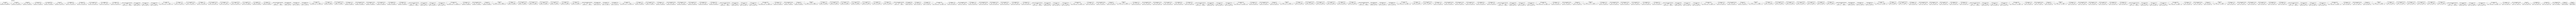

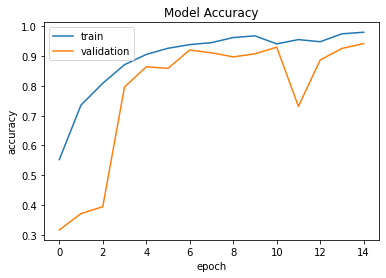

In [14]:
import matplotlib.pyplot as plt 

def plot_hist(history):
    plt.plot(history.history["accuracy"])
    plt.plot(history.history["val_accuracy"])
    plt.title("Model Accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show
    
plot_hist(history)

tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    rankdir="LR",
    expand_nested=True,
    dpi=96,
    layer_range=None,)

# Testing the model on Unseen data

In [15]:
#to do: add test dataset of like 20 pics of unseen data
lastTrainedModel=load_model('./lastTrainedModel.h5')
bestModel = load_model('./bestModel.h5')

prediction = bestModel.predict(validation_dataset)
print(prediction)

[[1.17658215e-04 9.99871254e-01 1.10778874e-05]
 [1.00000000e+00 1.75012680e-08 2.66494465e-10]
 [9.99999642e-01 3.80125698e-07 2.90204927e-09]
 ...
 [1.20333166e-09 1.00000000e+00 1.20124866e-14]
 [4.25048929e-09 1.77141892e-08 1.00000000e+00]
 [1.17439822e-05 1.25796009e-06 9.99987006e-01]]


(224, 224, 3)
[[8.5002910e-19 1.0000000e+00 2.2969254e-34]]
meningioma


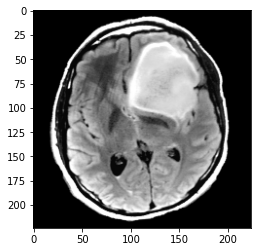

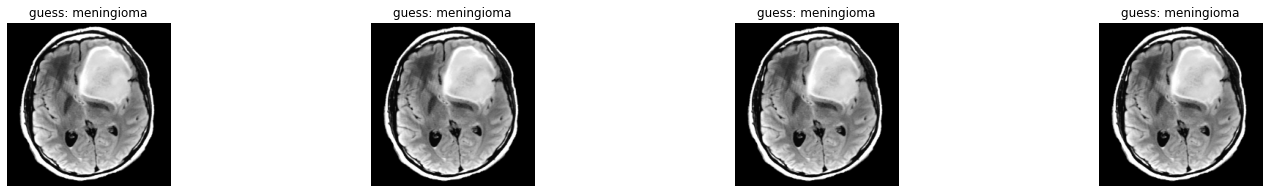

In [16]:
bestModel = load_model('./bestModel.h5')
test_path = '../input/eheheheh/MRI-scan-data-top-view-from-2014-showing-the-large-astrocytoma-brain-tumor-white.png'
img = cv2.imread(test_path)
img = cv2.resize(img,(224,224))
print(img.shape)
imshow(img)
test_results = bestModel.predict(np.expand_dims(img,axis = 0))

print(test_results)
print(translate(test_results,class_names))

c = 4
fig, subplots = plt.subplots(1, c)
fig.set_size_inches(25, 3)
for i in range(c):
    #n = np.random.randint(0, len(validation_dataset))
    guess = str(translate(test_results,class_names)).ljust(4, "0")
    

    subplot = subplots[i]
    subplot.imshow(img, cmap="gray")
    subplot.set_title(f"guess: {guess}")
    subplot.axis("off")
plt.show()